## **Clustering with Genetic Algorithm on Dry Beans Dataset** ##

### Overview

This project demonstrates the application of a genetic algorithm to perform clustering on the **dry beans** dataset. Genetic algorithms, inspired by the process of natural selection, are utilized to find optimal or near-optimal solutions in complex search spaces.




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.utils import check_random_state, check_array
from scipy.spatial.distance import euclidean
from sklearn.metrics import euclidean_distances
from sklearn.metrics import silhouette_score, calinski_harabasz_score

## Download data(Colab)

In [18]:
#@title Download data(Colab)
!wget https://www.muratkoklu.com/datasets/Dry_Bean_Dataset.zip
!unzip /content/Dry_Bean_Dataset.zip

--2024-07-12 15:59:51--  https://www.muratkoklu.com/datasets/Dry_Bean_Dataset.zip
Resolving www.muratkoklu.com (www.muratkoklu.com)... 185.179.25.150
Connecting to www.muratkoklu.com (www.muratkoklu.com)|185.179.25.150|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4739065 (4.5M) [application/zip]
Saving to: ‘Dry_Bean_Dataset.zip.1’

Dry_Bean_Dataset.zi 100%[===================>]   4.52M  3.93MB/s    in 1.2s    

2024-07-12 15:59:53 (3.93 MB/s) - ‘Dry_Bean_Dataset.zip.1’ saved [4739065/4739065]

Archive:  /content/Dry_Bean_Dataset.zip
replace Dry_Bean_Dataset/Dry_Bean_Dataset.arff? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Download data(Local)

In [2]:

import os, requests, zipfile

fname = "Dry_Bean_Dataset.zip"
url = "https://www.muratkoklu.com/datasets/Dry_Bean_Dataset.zip"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

# Define the relative path to the zip file
zip_file_path = './Dry_Bean_Dataset.zip'  # Change this to the relative path of your zip file

# Define the extraction directory relative to the current working directory
extract_dir = './Dry_Bean_Dataset'  # This will create a folder named 'extracted_files' in the current directory

# Ensure the extraction directory exists
os.makedirs(extract_dir, exist_ok=True)

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents
    zip_ref.extractall(extract_dir)

print(f"Files extracted to {extract_dir}")

Files extracted to ./Dry_Bean_Dataset


### **Dry Beans Dataset**

The dry beans dataset contains various features of different types of dry beans. Each instance represents a sample with attributes such as shape, roundness, and etc. <br>
DATASET: https://www.muratkoklu.com/datasets/ <br>

#### **References**
KOKLU, M. and OZKAN, I.A., (2020), Multiclass Classification of Dry Beans Using Computer Vision and Machine Learning Techniques. Computers and Electronics in Agriculture, 174, 105507. DOI: https://doi.org/10.1016/j.compag.2020.105507

In [5]:
data = pd.read_excel("/content/Dry_Bean_Dataset/Dry_Bean_Dataset.xlsx")
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [7]:
cdf = data.copy()

In [8]:
cdf.drop_duplicates()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [9]:
cdf.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [10]:
label = cdf["Class"]
cdf = cdf.drop(["Class"], axis=1)

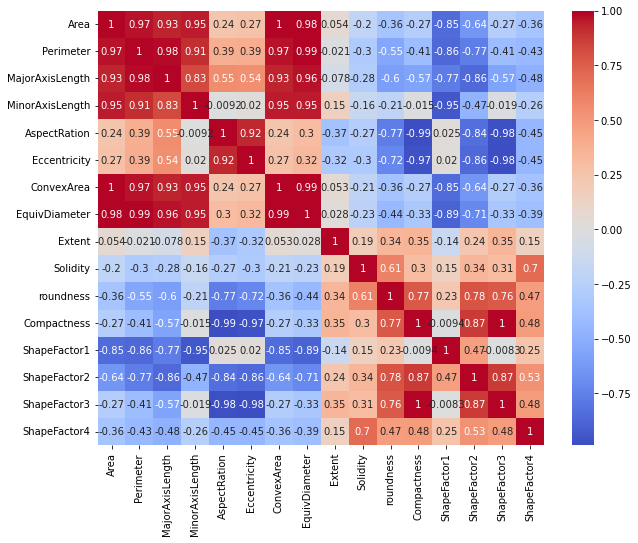

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(cdf.corr(), annot=True, cmap='coolwarm', center=0)
plt.show()

In [12]:
cdf.shape

(13611, 16)

In [13]:
sampled_data = data.groupby('Class').sample(n=100, random_state=1)
sampled_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
2315,61959,933.915,338.527626,234.384298,1.444327,0.721549,62621,280.871232,0.822305,0.989428,0.892688,0.829685,0.005464,0.001597,0.688377,0.994242,BARBUNYA
2217,59151,931.540,305.938941,247.631523,1.235460,0.587237,60079,274.432856,0.797699,0.984554,0.856582,0.897018,0.005172,0.002066,0.804642,0.994103,BARBUNYA
2881,73078,1012.867,378.135180,246.944057,1.531258,0.757308,73829,305.034096,0.790237,0.989828,0.895141,0.806680,0.005174,0.001352,0.650733,0.996440,BARBUNYA
3114,79035,1077.848,392.822264,257.477060,1.525659,0.755235,80061,317.223088,0.798817,0.987185,0.854898,0.807549,0.004970,0.001304,0.652135,0.994936,BARBUNYA
2213,58962,931.901,335.844087,224.666621,1.494855,0.743297,59755,273.994069,0.700128,0.986729,0.853184,0.815837,0.005696,0.001557,0.665590,0.994961,BARBUNYA


In [14]:
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 2315 to 8152
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             700 non-null    int64  
 1   Perimeter        700 non-null    float64
 2   MajorAxisLength  700 non-null    float64
 3   MinorAxisLength  700 non-null    float64
 4   AspectRation     700 non-null    float64
 5   Eccentricity     700 non-null    float64
 6   ConvexArea       700 non-null    int64  
 7   EquivDiameter    700 non-null    float64
 8   Extent           700 non-null    float64
 9   Solidity         700 non-null    float64
 10  roundness        700 non-null    float64
 11  Compactness      700 non-null    float64
 12  ShapeFactor1     700 non-null    float64
 13  ShapeFactor2     700 non-null    float64
 14  ShapeFactor3     700 non-null    float64
 15  ShapeFactor4     700 non-null    float64
 16  Class            700 non-null    object 
dtypes: float64(1

In [15]:
sampled_data = sampled_data.drop(["Class"],axis=1)
sampled_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
2315,61959,933.915,338.527626,234.384298,1.444327,0.721549,62621,280.871232,0.822305,0.989428,0.892688,0.829685,0.005464,0.001597,0.688377,0.994242
2217,59151,931.540,305.938941,247.631523,1.235460,0.587237,60079,274.432856,0.797699,0.984554,0.856582,0.897018,0.005172,0.002066,0.804642,0.994103
2881,73078,1012.867,378.135180,246.944057,1.531258,0.757308,73829,305.034096,0.790237,0.989828,0.895141,0.806680,0.005174,0.001352,0.650733,0.996440
3114,79035,1077.848,392.822264,257.477060,1.525659,0.755235,80061,317.223088,0.798817,0.987185,0.854898,0.807549,0.004970,0.001304,0.652135,0.994936
2213,58962,931.901,335.844087,224.666621,1.494855,0.743297,59755,273.994069,0.700128,0.986729,0.853184,0.815837,0.005696,0.001557,0.665590,0.994961


 # Genetic Algorthm Class


In [16]:
class GAClustering:
    """
    Genetic Algorithm-based Clustering.

    This class implements a clustering algorithm based on a genetic algorithm
    to optimize the centroids of clusters.

    Reference
    ---------
    Genetic algorithm-based clustering technique.
    Ujjwal Maulik, Sanghamitra Bandyoypadhyay.
    2000.

    Parameters:
    ----------
    n_clusters : int, optional, default=7
        The number of clusters to form.
    population_size : int, optional, default=7
        The number of individuals in the population.
    max_iter : int, optional, default=100
        The maximum number of iterations.
    prob_crossover : float, optional, default=0.8
        The probability of crossover between individuals.
    prob_mutation : float, optional, default=0.001
        The probability of mutation in individuals.
    tol : float, optional, default=1e-3
        The tolerance for convergence.
    verbose : int, optional, default=0
        The verbosity level.
    random_state : int or None, optional, default=None
        The seed for the random number generator.

    Methods:
    -------
    fitness(X, population, pop_labels, dist):
        Evaluates the fitness of each individual in the population.
    selection(population, pop_labels, n_remove):
        Selects the fittest individuals to form a new population.
    crossover(population, n_features):
        Applies crossover to create new individuals.
    mutation(crossover_children, n_features):
        Applies mutation to the crossover children.
    run(X, y=None):
        Runs the genetic algorithm to cluster the data.

    Example:
    --------
    >>> ga_clustering = GAClustering(n_clusters=3, population_size=10, max_iter=50)
    >>> labels, centers = ga_clustering.run(data)
    """

    def __init__(self, n_clusters=7, population_size=7, max_iter=100,
                 prob_crossover=0.8, prob_mutation=0.001, tol=1e-3,
                 verbose=0, random_state=None):
        self.n_clusters = n_clusters
        self.population_size = population_size
        self.max_iter = max_iter
        self.prob_crossover = prob_crossover
        self.prob_mutation = prob_mutation
        self.tol = tol
        self.verbose = verbose
        self.random_state = random_state

    def fitness(self, X, population, pop_labels, dist):
        """
        Evaluates the fitness of each individual in the population.

        Parameters:
        ----------
        X : array-like of shape (n_samples, n_features)
            The input data.
        population : array-like of shape (population_size, n_clusters * n_features)
            The current population of individuals.
        pop_labels : array-like of shape (n_samples, population_size)
            The cluster labels for each individual in the population.
        dist : array-like of shape (n_samples, n_clusters)
            The distance matrix.

        Returns:
        -------
        None
        """
        n_samples = X.shape[0]
        n_features = X.shape[1]
        metric = np.zeros(self.population_size)

        for i in range(self.population_size):
            dist.fill(0)
            centers = population[i].reshape(self.n_clusters, n_features)

            for sample_idx in range(n_samples):
                for cluster_idx in range(self.n_clusters):
                    dist[sample_idx, cluster_idx] = np.linalg.norm(X[sample_idx] - centers[cluster_idx])

            pop_labels[:, i] = dist.argmin(axis=1)

            for cluster_idx in range(self.n_clusters):
                mask = (pop_labels[:, i] == cluster_idx)
                if mask.sum() == 0:
                    random_index = np.random.randint(n_samples)
                    centers[cluster_idx] = X[random_index]
                    mask = (pop_labels[:, i] == cluster_idx)

                cluster_points = X[mask]
                count = cluster_points.shape[0]

                if count > 0:
                    centers[cluster_idx] = cluster_points.mean(axis=0)
                    temp_metric = np.zeros(count)

                    for point_idx in range(count):
                        temp_metric[point_idx] = np.linalg.norm(cluster_points[point_idx] - centers[cluster_idx])

                    metric[i] += temp_metric.sum()
                else:
                    metric[i] += np.inf

            population[i] = centers.reshape(1, self.n_clusters * n_features)

        self.fitness_ = 1 / (metric + 1e-10)

    def selection(self, population, pop_labels, n_remove):
        """
        Selects the fittest individuals to form a new population.

        Parameters:
        ----------
        population : array-like of shape (population_size, n_clusters * n_features)
            The current population of individuals.
        pop_labels : array-like of shape (n_samples, population_size)
            The cluster labels for each individual in the population.
        n_remove : int
            The number of individuals to remove.

        Returns:
        -------
        None
        """
        for _ in range(n_remove):
            min_index = np.argmin(self.fitness_)
            population = np.delete(population, min_index, axis=0)
            pop_labels = np.delete(pop_labels, min_index, axis=1)
            self.fitness_ = np.delete(self.fitness_, min_index)
        self.population_size -= n_remove

    def crossover(self, population, n_features):
        """
        Applies crossover to create new individuals.

        Parameters:
        ----------
        population : array-like of shape (population_size, n_clusters * n_features)
            The current population of individuals.
        n_features : int
            The number of features in the input data.

        Returns:
        -------
        crossover_children : array-like of shape (num_crossovers * 2, n_clusters * n_features)
            The new individuals created through crossover.
        """
        num_crossovers = int(self.prob_crossover * self.population_size // 2)
        crossover_children = np.zeros((num_crossovers * 2, self.n_clusters * n_features))

        for i in range(num_crossovers):
            rs = check_random_state(self.random_state)
            parents_indices = rs.randint(self.population_size, size=2)
            crossover_children[i * 2: i * 2 + 2, :] = population[parents_indices]
            crossover_point = n_features * rs.randint(1, self.n_clusters)
            temp = crossover_children[i * 2, crossover_point:].copy()
            crossover_children[i * 2, crossover_point:] = crossover_children[i * 2 + 1, crossover_point:]
            crossover_children[i * 2 + 1, crossover_point:] = temp

        return crossover_children

    def mutation(self, crossover_children, n_features):
        """
        Applies mutation to the crossover children.

        Parameters:
        ----------
        crossover_children : array-like of shape (num_crossovers * 2, n_clusters * n_features)
            The new individuals created through crossover.
        n_features : int
            The number of features in the input data.

        Returns:
        -------
        crossover_children : array-like of shape (num_crossovers * 2, n_clusters * n_features)
            The mutated individuals.
        """
        num_cross_children = crossover_children.shape[0]
        num_mutations = int(self.prob_mutation * num_cross_children * self.n_clusters * n_features)

        for i in range(num_mutations):
            rs = check_random_state(self.random_state)
            child_idx = rs.randint(num_cross_children)
            mutation_value = rs.uniform(0, 1)
            gene_idx = rs.randint(self.n_clusters * n_features)
            mutation_sign = rs.randint(2)

            if mutation_sign == 0:
                if crossover_children[child_idx, gene_idx] != 0:
                    crossover_children[child_idx, gene_idx] += 2 * mutation_value * crossover_children[child_idx, gene_idx]
                else:
                    crossover_children[child_idx, gene_idx] = 2 * mutation_value
            else:
                if crossover_children[child_idx, gene_idx] != 0:
                    crossover_children[child_idx, gene_idx] -= 2 * mutation_value * crossover_children[child_idx, gene_idx]
                else:
                    crossover_children[child_idx, gene_idx] = -2 * mutation_value

        return crossover_children

    def run(self, X, y=None):
        """
        Runs the genetic algorithm to cluster the data.

        Parameters:
        ----------
        X : array-like of shape (n_samples, n_features)
            The input data.
        y : Ignored
            Not used, present here for API consistency by convention.

        Returns:
        -------
        labels_ : array-like of shape (n_samples,)
            The cluster labels for each data point.
        centers_ : array-like of shape (n_clusters, n_features)
            The final cluster centers.
        """
        n_samples = X.shape[0]
        n_features = X.shape[1]

        rs = check_random_state(self.random_state)
        self.labels_ = np.zeros((n_samples))
        pop_labels = np.zeros((n_samples, self.population_size))
        population = np.zeros((self.population_size, self.n_clusters * n_features))

        for i in range(self.population_size):
            population_indices = rs.randint(n_samples, size=self.n_clusters)
            population[i, :] = X[population_indices].ravel()

        self.centers_ = np.zeros((self.n_clusters, n_features))
        dist = np.zeros((n_samples, self.n_clusters))
        old_population_size = self.population_size

        for iteration in range(self.max_iter):
            self.fitness(X, population, pop_labels, dist)
            fittest = np.argmax(self.fitness_)
            self.centers_ = population[fittest].reshape(self.n_clusters, n_features)
            old_labels = self.labels_
            self.labels_ = pop_labels[:, fittest]
            num_same_labels = (old_labels == self.labels_).sum()

            if 1 - num_same_labels / n_samples < self.tol:
                break

            num_remove = self.population_size - old_population_size
            self.selection(population, pop_labels, num_remove)

            self.population_size = old_population_size
            cross_children = self.crossover(population, n_features)
            mutated_children = self.mutation(cross_children, n_features)

            population = np.vstack([population, cross_children, mutated_children])
            old_population_size = self.population_size
            self.population_size = population.shape[0]
            new_labels = rs.randint(self.n_clusters, size=(n_samples, self.population_size - old_population_size))
            pop_labels = np.hstack([pop_labels, new_labels])

        self.X_fit_ = X
        return self.labels_, self.centers_

In [17]:
sample_arr = sampled_data.to_numpy()

In [18]:
ga = GAClustering()
labels, centers = ga.run(sample_arr)

In [19]:
labels

array([2., 4., 2., 0., 4., 2., 0., 0., 0., 2., 2., 2., 0., 2., 2., 2., 4.,
       4., 2., 4., 2., 4., 4., 0., 0., 0., 2., 2., 2., 0., 2., 2., 2., 4.,
       2., 0., 4., 2., 2., 4., 4., 0., 0., 2., 0., 2., 2., 4., 2., 2., 2.,
       0., 3., 4., 2., 0., 2., 2., 2., 2., 2., 2., 4., 2., 2., 2., 2., 2.,
       0., 0., 2., 2., 4., 2., 0., 2., 2., 2., 2., 2., 0., 2., 2., 2., 0.,
       0., 2., 2., 2., 0., 2., 2., 2., 2., 0., 2., 2., 4., 2., 0., 5., 6.,
       5., 6., 5., 6., 5., 5., 6., 5., 5., 6., 5., 5., 6., 6., 6., 5., 6.,
       6., 6., 6., 6., 6., 5., 5., 5., 6., 6., 5., 6., 6., 6., 5., 6., 6.,
       6., 6., 6., 6., 6., 5., 5., 6., 5., 6., 6., 5., 5., 5., 6., 6., 6.,
       6., 5., 6., 5., 5., 6., 6., 6., 6., 6., 5., 6., 5., 6., 5., 5., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 5., 5., 6., 6., 5., 6., 5., 6., 5.,
       6., 6., 6., 6., 5., 5., 5., 5., 5., 6., 5., 5., 6., 0., 0., 2., 2.,
       2., 0., 0., 0., 2., 0., 2., 2., 0., 2., 2., 2., 0., 2., 0., 0., 2.,
       4., 2., 2., 0., 0.

In [20]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(sample_arr)

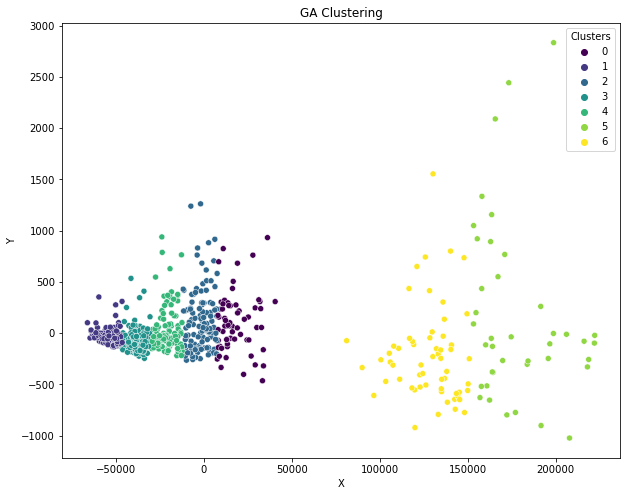

In [21]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data_2d[:, 0], y=data_2d[:, 1], hue=labels, palette='viridis')
plt.title('GA Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(title='Clusters')
plt.show()

## Comparing with k-Means

In [22]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(sample_arr)
kmeans.labels_

array([0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0,
       0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3, 3, 0,
       3, 3, 3, 0, 3, 0, 3, 3, 2, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3,
       3, 0, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 3, 1, 1, 1, 6, 1, 1, 1, 1, 6, 4,
       1, 6, 1, 4, 6, 1, 6, 1, 6, 6, 1, 6, 6, 6, 4, 1, 1, 6, 6, 4, 1, 6,
       6, 1, 6, 1, 6, 6, 6, 1, 6, 1, 4, 6, 1, 6, 6, 1, 1, 1, 1, 6, 6, 6,
       4, 6, 4, 4, 6, 6, 6, 6, 6, 1, 1, 4, 6, 4, 1, 6, 1, 6, 1, 6, 6, 1,
       1, 6, 4, 4, 1, 6, 4, 6, 1, 6, 1, 1, 6, 6, 6, 4, 1, 1, 1, 1, 1, 4,
       1, 6, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 0, 0, 3, 0,
       3, 0, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 0, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 5,

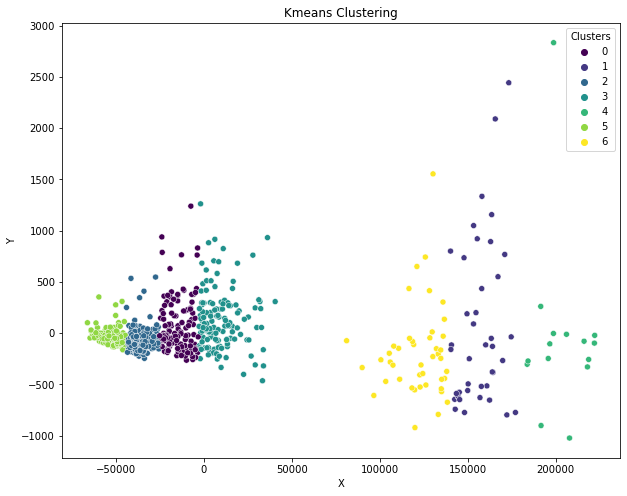

In [23]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data_2d[:, 0], y=data_2d[:, 1], hue=kmeans.labels_, palette='viridis')
plt.title('Kmeans Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(title='Clusters')
plt.show()

In [24]:
c_kmeans = kmeans.cluster_centers_
c_ga = centers

In [25]:
two_d_c_means = pca.fit_transform(c_kmeans)
two_d_c_ga = pca.fit_transform(c_ga)

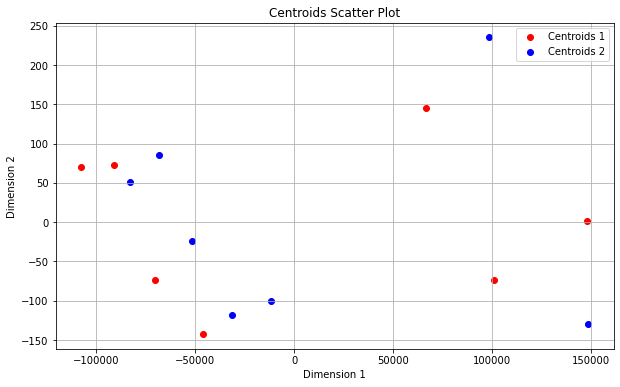

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(two_d_c_means[:, 0], two_d_c_means[:, 1], color='red', label='Centroids 1')
plt.scatter(two_d_c_ga[:, 0], two_d_c_ga[:, 1], color='blue', label='Centroids 2')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Centroids Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()

## Kmeans Result

In [27]:
inertia = kmeans.inertia_
silhouette = silhouette_score(sampled_data, kmeans.labels_)
calinski_harabasz = calinski_harabasz_score(sampled_data, kmeans.labels_)

print("Inertia:", inertia)
print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Index:", calinski_harabasz)

Inertia: 44468973627.84183
Silhouette Score: 0.542323982972079
Calinski-Harabasz Index: 7664.12554098434


## GA Result

In [28]:
silhouette = silhouette_score(sampled_data, labels)
calinski_harabasz = calinski_harabasz_score(sampled_data, labels)

print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Index:", calinski_harabasz)

Silhouette Score: 0.5437120227431363
Calinski-Harabasz Index: 6576.006028970839


## References

[1]. KOKLU, M. and OZKAN, I.A., (2020), Multiclass Classification of Dry Beans Using Computer Vision and Machine Learning Techniques. Computers and Electronics in Agriculture, 174, 105507. DOI: https://doi.org/10.1016/j.compag.2020.105507

[2]. https://gist.github.com/IshankGulati/85e0051fb4c67e48c414
